In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import math
import pandas as pd
import itertools

matplotlib.rc('font', family='Arial')

# REM

In [2]:
with open('simulationResults/REM_gamma_arrival1__gamma2_1__2_5_07_queue_size_history.pkl', 'rb') as input:
    queue_history = pickle.load(input)

## Wartość oczekiwana długości kolejki


In [3]:
history=pd.DataFrame(data=queue_history,columns=["start_time","queue_length"])

history["state_duration"]=-history.start_time.diff(periods=-1)
history=history[:-1]
avarage=np.average(history.queue_length,weights=history.state_duration)
avarage

3.1801635961901451

## Rozkład stacjonarny długości

In [4]:
history=pd.DataFrame(data=queue_history,columns=["start_time","queue_length"])

history["state_duration"]=-history.start_time.diff(periods=-1)
history=history[:-1]    
time_in_state_df=history.groupby(['queue_length']).sum()[["state_duration"]]  
time_in_state_df["state_probability"]=time_in_state_df.state_duration/time_in_state_df.state_duration.sum()
time_in_state_df[["state_probability"]]

state_probability
queue_length                   
0.0                    0.024224
1.0                    0.062617
2.0                    0.162915
3.0                    0.335574
4.0                    0.288358
5.0                    0.126313

## wykres długości kolejki

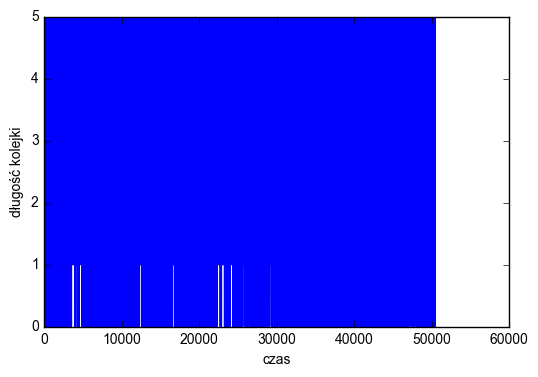

In [5]:
x, y = queue_history.T
plt.plot(x,y)
plt.xlabel(u"czas")
plt.ylabel(u"długość kolejki")
plt.savefig('pictures/queue_length_gamma.jpg')
plt.show()

## Rozkład liczby kolejno (seryjnie) traconych zgłoszeń

In [6]:
with open('simulationResults/REM_gamma_arrival1__gamma2_1__2_5_07_queue_acceptance_history.pkl', 'rb') as input:
    queue_acceptance = pickle.load(input)

In [7]:
acceptance_history = pd.DataFrame(data=queue_acceptance,columns=["arrival_time","was_accepted"]) 
numer_of_subsequent_rejections_list = [ sum( 1 for _ in group ) for key, group in itertools.groupby( acceptance_history.was_accepted.values ) if key == 0 ];
subsequent_rejections_df = pd.DataFrame(data = numer_of_subsequent_rejections_list, columns = ["subsequent_rejections"])
subsequent_rejections_distribution = pd.DataFrame(subsequent_rejections_df.subsequent_rejections.value_counts()/len(subsequent_rejections_df) )
subsequent_rejections_distribution

subsequent_rejections
1                0.452021
2                0.242567
3                0.133701
4                0.074684
5                0.043440
6                0.025636
7                0.012284
8                0.007299
9                0.003739
10               0.002581
11               0.000890
12               0.000623
14               0.000356
13               0.000178

In [8]:
 pd.DataFrame(subsequent_rejections_df.subsequent_rejections.value_counts()/len(acceptance_history))

subsequent_rejections
1                0.101662
2                0.054555
3                0.030070
4                0.016797
5                0.009770
6                0.005766
7                0.002763
8                0.001642
9                0.000841
10               0.000581
11               0.000200
12               0.000140
14               0.000080
13               0.000040

In [9]:
len(numer_of_subsequent_rejections_list)

11234

In [10]:
queue_history

array([[  0.00000000e+00,   3.00000000e+00],
       [  8.29861400e-01,   2.00000000e+00],
       [  1.15960890e+00,   3.00000000e+00],
       ..., 
       [  5.04528813e+04,   2.00000000e+00],
       [  5.04554957e+04,   3.00000000e+00],
       [  5.04571548e+04,   4.00000000e+00]])

In [11]:
acceptance_history

arrival_time  was_accepted
0          0.000000           1.0
1          1.153648           1.0
2          2.482899           1.0
3          2.554400           1.0
4          3.523832           0.0
5          4.968462           1.0
6          8.419081           1.0
7         11.180314           1.0
8         11.748783           1.0
9         11.823599           1.0
10        11.848413           0.0
11        12.185708           1.0
12        12.968916           1.0
13        13.441071           0.0
14        13.573003           0.0
15        14.040195           0.0
16        14.874023           0.0
17        14.989079           0.0
18        18.374292           1.0
19        18.940258           0.0
20        19.270556           1.0
21        19.457956           0.0
22        21.454419           1.0
23        22.077364           1.0
24        22.515350           1.0
25        23.373778           1.0
26        24.105510           1.0
27        25.791471           0.0
28        27.191201           1.0
29        28.065597           0.0
...             ...           ...
49920  50428.554112           0.0
49921  50428.856584           0.0
49922  50428.993954           0.0
49923  50430.071040           0.0
49924  50432.921824           1.0
49925  50434.783749           1.0
49926  50435.088588           1.0
49927  50435.420066           1.0
49928  50436.017703           1.0
49929  50436.928933           0.0
49930  50437.772204           0.0
49931  50438.075744           0.0
49932  50438.809281           1.0
49933  50442.705396           0.0
49934  50442.809090           0.0
49935  50443.006913           0.0
49936  50443.222716           0.0
49937  50445.320809           0.0
49938  50447.620701           1.0
49939  50447.849953           0.0
49940  50448.014484           1.0
49941  50448.751067           1.0
49942  50450.722473           0.0
49943  50451.333020           1.0
49944  50452.730030           0.0
49945  50452.767107           0.0
49946  50455.467395           1.0
49947  50455.836475           0.0
49948  50456.643460           0.0
49949  50457.138502           1.0

[49950 rows x 2 columns]

In [12]:
acceptance_history = pd.DataFrame(data=queue_acceptance,columns=["arrival_time","was_accepted"]) 
numer_of_subsequent_rejections_list = [ [sum( 1 for _ in group ),key] for key, group in itertools.groupby( acceptance_history.was_accepted.values ) if key == 0 ];
numer_of_subsequent_rejections_list

[[1, 0.0],
 [1, 0.0],
 [5, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [4, 0.0],
 [5, 0.0],
 [1, 0.0],
 [1, 0.0],
 [5, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [3, 0.0],
 [3, 0.0],
 [4, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [8, 0.0],
 [1, 0.0],
 [5, 0.0],
 [10, 0.0],
 [1, 0.0],
 [6, 0.0],
 [4, 0.0],
 [1, 0.0],
 [3, 0.0],
 [9, 0.0],
 [1, 0.0],
 [3, 0.0],
 [4, 0.0],
 [3, 0.0],
 [2, 0.0],
 [1, 0.0],
 [3, 0.0],
 [3, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [3, 0.0],
 [3, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [3, 0.0],
 [1, 0.0],
 [3, 0.0],
 [4, 0.0],
 [3, 0.0],
 [3, 0.0],
 [4, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [4, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [2, 0.0],
 [1, 0.0],
 [4, 0.0],
 [4, 0.0],
 [2, 0.0],
 [3, 0.0],
 [1, 0.0],
 [4, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [5, 0.0],
 [1, 0.0],
 [1, 0.0],
 [3, 0.0],
 [1, 0.0],
 [1, 0.0],
 [1, 0.0],
 [4, 0.0],
 [1, 0.0]

In [13]:
 acceptance_history[acceptance_history["was_accepted"]==0]
    


arrival_time  was_accepted
4          3.523832           0.0
10        11.848413           0.0
13        13.441071           0.0
14        13.573003           0.0
15        14.040195           0.0
16        14.874023           0.0
17        14.989079           0.0
19        18.940258           0.0
21        19.457956           0.0
27        25.791471           0.0
29        28.065597           0.0
31        28.481228           0.0
32        31.483019           0.0
33        31.671501           0.0
34        32.811857           0.0
37        33.590941           0.0
38        34.172941           0.0
39        34.178249           0.0
40        35.043388           0.0
41        36.848777           0.0
43        37.240625           0.0
46        43.196328           0.0
48        43.613947           0.0
49        44.680606           0.0
50        45.257068           0.0
51        45.838756           0.0
52        45.958293           0.0
54        46.954739           0.0
59        51.647436           0.0
61        53.577324           0.0
...             ...           ...
49891  50401.170413           0.0
49893  50401.299863           0.0
49894  50404.116431           0.0
49896  50405.722192           0.0
49897  50406.217241           0.0
49898  50406.642757           0.0
49900  50407.575777           0.0
49903  50411.864934           0.0
49909  50418.964401           0.0
49911  50420.452879           0.0
49914  50423.340282           0.0
49918  50428.431983           0.0
49920  50428.554112           0.0
49921  50428.856584           0.0
49922  50428.993954           0.0
49923  50430.071040           0.0
49929  50436.928933           0.0
49930  50437.772204           0.0
49931  50438.075744           0.0
49933  50442.705396           0.0
49934  50442.809090           0.0
49935  50443.006913           0.0
49936  50443.222716           0.0
49937  50445.320809           0.0
49939  50447.849953           0.0
49942  50450.722473           0.0
49944  50452.730030           0.0
49945  50452.767107           0.0
49947  50455.836475           0.0
49948  50456.643460           0.0

[25124 rows x 2 columns]

In [14]:
np.random.uniform(0, 1, 100000)

array([ 0.72488083,  0.93274859,  0.94352592, ...,  0.52679844,
        0.02297306,  0.36137223])